In [1]:
# IMPORT DATA

import pandas as pd

df = pd.read_csv('dataset_tyler_combined_match_1753.csv')
df.dropna(inplace=True)

player_dfs = []
for player in df['player_name'].unique():
    player_df = df[df['player_name'] == player].copy()

    player_df['prev_x-ma5'] = player_df['x-ma5'].shift(1)
    player_df['prev_x-ma20'] = player_df['x-ma20'].shift(1)

    player_dfs.append(player_df)

df = pd.concat(player_dfs)
df.dropna(inplace=True)

print(len(df))
df.sample(15)

1537


,unix,player_name,opp_name,player_elo,opp_elo,elo_diff,player_acc,opp_acc,acc_diff,color,x-ma5,x-ma20,opp_x-ma5,opp_x-ma20,won,num_reque,time_since_prev,prev_acc,prev_x-ma5,prev_x-ma20
1477,1699846880,BIG_TONKA_T,JBSLMS,1356,1347,9,83.15,79.46,3.69,True,14.8,1.60,4.2,-6.05,1.0,0,1464,73.36,10.8,-16.30
564,1697313275,BIG_TONKA_T,hassan_khan_dev,1217,1238,-21,84.04,72.56,11.48,True,7.8,36.95,-9.6,-14.05,1.0,17,191,63.28,4.0,35.45
1164,1699333993,BIG_TONKA_T,n00bdrm,1434,1430,4,74.53,62.89,11.64,False,10.0,-8.95,-6.2,-37.95,1.0,10,947,78.06,7.0,-13.95
232,1696784084,BIG_TONKA_T,G_jeevan,1368,1373,-5,71.10,76.99,-5.89,True,16.6,49.65,4.6,13.70,0.0,1,1141,82.64,16.8,36.70
178,1696573636,BIG_TONKA_T,ThatDamnOldCat,1288,1305,-17,60.00,67.53,-7.53,False,5.0,17.20,-17.2,-19.05,0.0,17,1018,73.70,2.4,-55.05
1376,1699725447,BIG_TONKA_T,Chesty0104,1419,1390,29,76.94,85.47,-8.53,False,8.0,-39.20,8.8,17.55,0.0,0,121983,58.07,-2.2,0.35
838,1698121864,BIG_TONKA_T,johnthronson,1447,1401,46,85.53,73.59,11.94,True,1.4,-29.10,3.8,4.65,1.0,1,221,67.66,10.6,63.70
152,1696544997,BIG_TONKA_T,FanGeo,1277,1281,-4,74.90,63.89,11.01,True,2.0,8.55,-5.8,-7.30,1.0,11,862,74.33,-8.4,14.60
1727,1700645158,BIG_TONKA_T,acanns,1459,1423,36,49.99,68.26,-18.27,False,-4.4,-45.30,-9.8,-9.30,0.0,9,454,81.19,-13.8,-66.15
61,1696274776,BIG_TONKA_T,sauciers,1062,1042,20,81.84,61.51,20.33,True,-14.6,-35.85,-14.8,-14.05,1.0,8,280,82.29,-12.0,27.45


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

In [3]:
# input predictors
X = df[['elo_diff', 'x-ma5', 'x-ma20', 'prev_x-ma5', 'prev_x-ma20', 'opp_x-ma5', 'opp_x-ma20', 'color', 'num_reque', 'time_since_prev', 'prev_acc']]

# target
y = df['won']

# Split the data train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def accuracy_plot(accuracies, save_images=False):
    best_accuracy = np.max(accuracies[0])
    for i in range(1, len(accuracies)):
        best_accuracy = max(best_accuracy, np.max(accuracies[i]))
    best_epoch = np.argmax(accuracies) + 1
    print('Best accuracy:', best_accuracy, 'at epoch', best_epoch)

    # Plot accuracies against epochs
    plt.rcParams['lines.linewidth'] = 2
    for i in range(len(accuracies)):
        plt.plot(range(1, len(accuracies[i]) + 1), accuracies[i], zorder=3)

    # Comparison lines
    plt.rcParams['lines.linewidth'] = 1.25
    plt.axhline(y=0.5, color='r', linestyle='--', label="50% winrate", zorder=2)
    plt.axhline(y=best_accuracy, color='b', linestyle='--', label="Best", zorder=2)

    # Labels and settings
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch (October) (each model)')
    plt.ylim(0.40, 0.65)
    plt.legend()
    plt.grid(alpha=0.55)

    num_ticks = 6
    tick_positions = np.linspace(1, len(accuracies[0]), num_ticks, endpoint=True)
    rounded_ticks = np.round(tick_positions)
    plt.xticks(ticks=tick_positions, labels=rounded_ticks)

    if save_images:
        plt.savefig('accuracy_plot_each_model.png')

    plt.show()

    # plot average accuracy
    plt.rcParams['lines.linewidth'] = 2
    plt.plot(range(1, len(accuracies[0]) + 1), np.mean(accuracies, axis=0), zorder=3)

    # best average accuracy
    best_accuracy = np.max(np.mean(accuracies, axis=0))
    best_epoch = np.argmax(np.mean(accuracies, axis=0)) + 1
    print('Best accuracy:', best_accuracy, 'at epoch', best_epoch)

    # Comparison lines
    plt.rcParams['lines.linewidth'] = 1.25
    plt.axhline(y=0.5, color='r', linestyle='--', label="50% winrate", zorder=2)
    plt.axhline(y=best_accuracy, color='b', linestyle='--', label="Best", zorder=2)

    # Labels and settings
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch (October) (average)')
    plt.ylim(0.40, 0.65)
    plt.legend()
    plt.grid(alpha=0.55)

    num_ticks = 6
    tick_positions = np.linspace(1, len(accuracies[0]), num_ticks, endpoint=True)
    rounded_ticks = np.round(tick_positions)
    plt.xticks(ticks=tick_positions, labels=rounded_ticks)

    if save_images:
        plt.savefig('accuracy_plot_average.png')

    plt.show()

In [32]:
from tensorflow.keras.optimizers import legacy

# Set a custom learning rate
learning_rate = 0.0001  # Adjust this value as needed

# Instantiate the legacy Adam optimizer with your custom learning rate
adam_optimizer = legacy.Adam(learning_rate=learning_rate)

model_accuracies = []

for i in range(5):
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    num_epochs = 60

    accuracies = []

    for epoch in range(num_epochs):
        model.fit(X_train, y_train, epochs=1, batch_size=128, verbose='0')

        loss, accuracy = model.evaluate(X_test, y_test)
        accuracies.append(accuracy)

    model_accuracies.append(accuracies)

10/10 [==============================] - 0s 2ms/step - loss: 0.7106 - accuracy: 0.5097


Best accuracy: 0.5681818127632141 at epoch 80


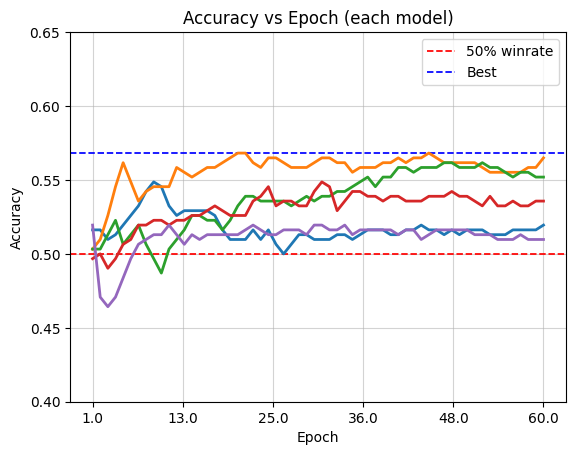

Best accuracy: 0.5396103739738465 at epoch 48


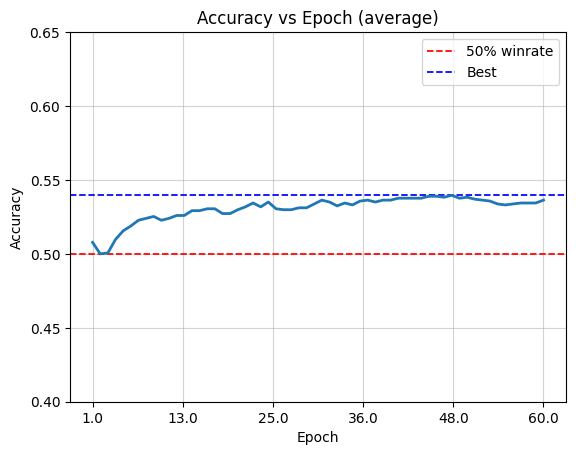

In [33]:
accuracy_plot(model_accuracies, save_images=True)

In [34]:
df_november = df[df['unix'] >= 1698811200] # filter for games in November
df_october = df[df['unix'] < 1698811200] # filter for games in October

# input predictors
X_november = df_november[['elo_diff', 'x-ma5', 'x-ma20', 'prev_x-ma5', 'prev_x-ma20', 'opp_x-ma5', 'opp_x-ma20', 'color', 'num_reque', 'time_since_prev', 'prev_acc']]
X_october = df_october[['elo_diff', 'x-ma5', 'x-ma20', 'prev_x-ma5', 'prev_x-ma20', 'opp_x-ma5', 'opp_x-ma20', 'color', 'num_reque', 'time_since_prev', 'prev_acc']]

# target
y_november = df_november['won']
y_october = df_october['won']

# Split the data train/test
X_train_nov, X_test_nov, y_train_nov, y_test_nov = train_test_split(X_november, y_november, test_size=0.2, random_state=42)
X_train_oct, X_test_oct, y_train_oct, y_test_oct = train_test_split(X_october, y_october, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_nov = scaler.fit_transform(X_train_nov)
X_test_nov = scaler.transform(X_test_nov)
X_train_oct = scaler.fit_transform(X_train_oct)
X_test_oct = scaler.transform(X_test_oct)

In [44]:
from tensorflow.keras.optimizers import legacy

# Set a custom learning rate
learning_rate = 0.0001  # Adjust this value as needed

# Instantiate the legacy Adam optimizer with your custom learning rate
adam_optimizer = legacy.Adam(learning_rate=learning_rate)

model_accuracies = []

for i in range(5):
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_nov.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    num_epochs = 60

    accuracies = []

    for epoch in range(num_epochs):
        model.fit(X_train_nov, y_train_nov, epochs=1, batch_size=128, verbose='0')

        loss, accuracy = model.evaluate(X_test_nov, y_test_nov)
        accuracies.append(accuracy)

    model_accuracies.append(accuracies)

5/5 [==============================] - 0s 3ms/step - loss: 0.7037 - accuracy: 0.4690


Best accuracy: 0.5862069129943848 at epoch 63


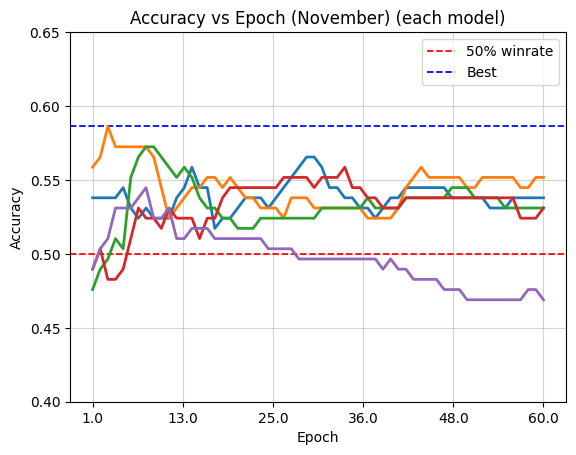

Best accuracy: 0.5489655137062073 at epoch 8


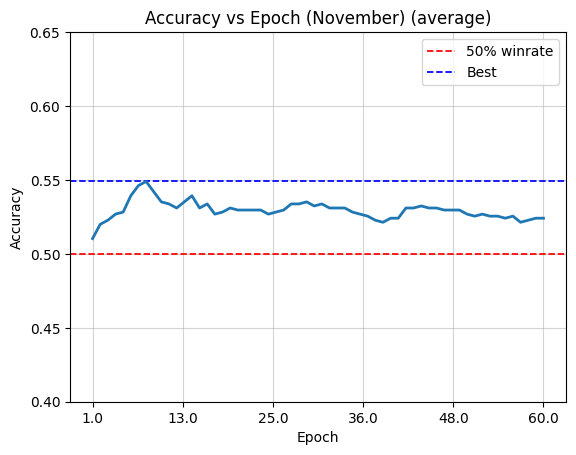

In [45]:
accuracy_plot(model_accuracies, save_images=True)

In [46]:
from tensorflow.keras.optimizers import legacy

# Set a custom learning rate
learning_rate = 0.0001  # Adjust this value as needed

# Instantiate the legacy Adam optimizer with your custom learning rate
adam_optimizer = legacy.Adam(learning_rate=learning_rate)

model_accuracies = []

for i in range(5):
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_oct.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    num_epochs = 60

    accuracies = []

    for epoch in range(num_epochs):
        model.fit(X_train_oct, y_train_oct, epochs=1, batch_size=128, verbose='0')

        loss, accuracy = model.evaluate(X_test_oct, y_test_oct)
        accuracies.append(accuracy)

    model_accuracies.append(accuracies)

6/6 [==============================] - 0s 3ms/step - loss: 0.7147 - accuracy: 0.5092


Best accuracy: 0.5766870975494385 at epoch 131


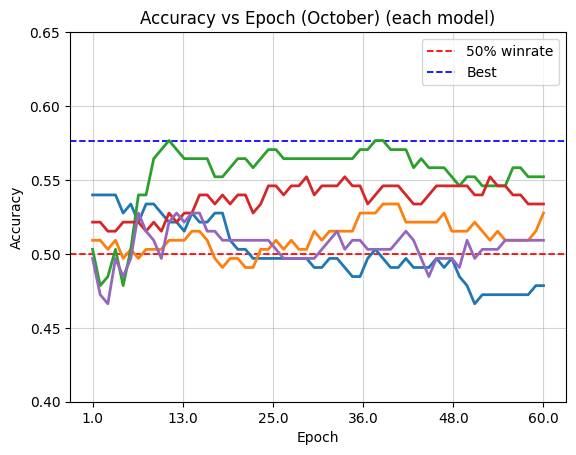

Best accuracy: 0.5337423324584961 at epoch 15


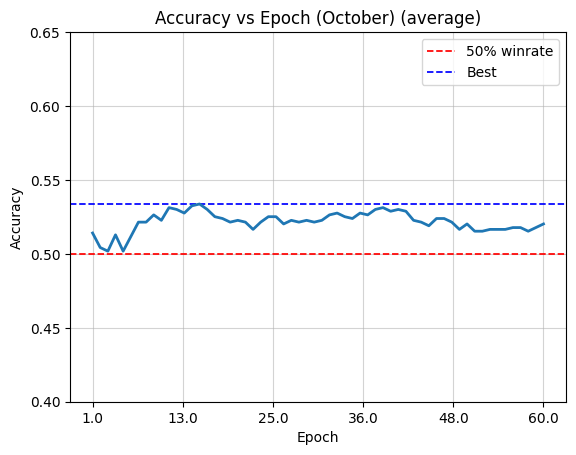

In [49]:
accuracy_plot(model_accuracies, save_images=True)